In [3]:
# importar la librería Requests que sirve para enviar consultas HTTP
import requests 
  
# api-endpoint 
endpoint = "https://api.openaq.org/v1/locations"
parameters = "?country=CL&limit=1000"
URL = endpoint+parameters

r = requests.get(url = URL) 
  
# extracting data in json format 
data = r.json() 
  
#print(data)

In [5]:
import pandas as pd

data_Norm = pd.DataFrame(data['results'])
#Mostramos los 10 primeros resultados
data_selected=data_Norm
data_selected.head(5)

,city,coordinates,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Huasco,"{'latitude': -28.467794, 'longitude': -71.227295}",236,CL,2018-08-31T13:00:00.000Z,2018-10-31T12:00:00.000Z,21 de Mayo,"[pm10, pm25]",Chile - SINCA,[Chile - SINCA]
1,21 de mayo,"{'latitude': -37.471184, 'longitude': -72.361465}",47716,CL,2015-09-23T14:00:00.000Z,2018-11-07T13:00:00.000Z,21 de mayo,"[pm10, pm25]",Chile - SINCA,[Chile - SINCA]
2,Puerto Montt,"{'latitude': -41.39917, 'longitude': -72.89952}",10311,CL,2017-03-27T23:00:00.000Z,2018-11-07T12:00:00.000Z,Alerce,[pm25],Chile - SINCA,[Chile - SINCA]
3,Alto Hospicio,"{'latitude': -20.290466, 'longitude': -70.10019}",18590,CL,2016-02-22T18:00:00.000Z,2018-11-07T12:00:00.000Z,Alto Hospicio,[pm25],Chile - SINCA,[Chile - SINCA]
4,Andacollo,"{'latitude': -30.227768, 'longitude': -71.08613}",22501,CL,2015-09-23T13:00:00.000Z,2018-11-07T13:00:00.000Z,Andacollo,[pm10],Chile - SINCA,[Chile - SINCA]


In [7]:
datas=data_selected[["location"]]
datas.head()

,location
0,21 de Mayo
1,21 de mayo
2,Alerce
3,Alto Hospicio
4,Andacollo


<BarContainer object of 127 artists>

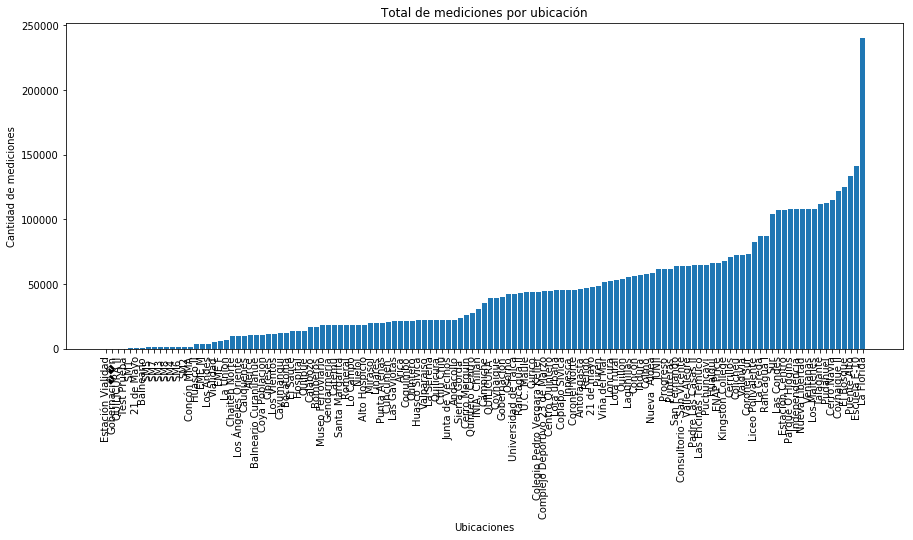

In [8]:
import matplotlib.pyplot as plt

#Definición del tamaño de la figura
plt.figure(figsize=(15,6))
data_selected=data_selected.sort_values(["count"])
#Definición de los datos que sirven de eje X e Y
x_co = data_selected["location"]
y_co = data_selected["count"]

#Leyenda
plt.xlabel('Ubicaciones')
plt.ylabel('Cantidad de mediciones')
plt.title('Total de mediciones por ubicación')
plt.xticks(rotation=90)

#Dibujar la visualización
plt.bar(x_co,y_co)

# Pregunta 2

In [79]:
import pymongo
from pymongo import MongoClient

#Nos conectamos a la instancia de Mongo local, puerto 27017
client = MongoClient('localhost', 27017)

#Nos conectamos a la BD 'notebook5_db'
db = client['notebook5_db']

#Dentro de la BD, creamos una nueva colección llamada 'pos'
collection = db['pos']

In [97]:
#Para Eliminar colecciones
db.drop_collection('pos')

{'ns': 'notebook5_db.pos', 'nIndexesWas': 1, 'ok': 1.0}

In [98]:
doc={"nombre":"Jorge",
     "carrera":"Informática",
     "Cursando":"Cuarto año",
     "Asignaturas":["INFO261", "INFO267", "INFO268", "INFO331"]}
collection.insert_one(doc)
doc=[{"nombre":"andrés",
     "carrera":"Informática",
     "Cursando":"Tercer año",
     "Asignaturas":["INFO261", "INFO331"]},
    {"nombre":"Enrique",
     "carrera":"Acústica",
     "Cursando":"Primer año",
     "Asignaturas":["BAIN016", "BAIN026"]},
    {"nombre":"Patricia",
     "carrera":"Electrónica",
     "Cursando":"Primer año",
     "Asignaturas":["BAIN032", "BAIN022"]}]
collection.insert_many(doc)
#Tres documentos añadidos

In [103]:
from pprint import pprint

for doc in collection.find():
    pprint(doc)

{'Asignaturas': ['BAIN016', 'BAIN026'],
 'Cursando': 'Primer año',
 '_id': ObjectId('5be2ca8620d8e70594c66333'),
 'carrera': 'Acústica',
 'nombre': 'Enrique'}
{'Asignaturas': ['BAIN032', 'BAIN022'],
 'Cursando': 'Primer año',
 '_id': ObjectId('5be2ca8620d8e70594c66334'),
 'carrera': 'Electrónica',
 'nombre': 'Patricia'}


In [100]:
#Editar el año un doc con nombre:'Jorge'
query={'nombre':'Jorge'}
collection.update_one(query, {"$set":{"Cursando":"Segundo año"}})
pprint(collection.find_one(query))

{'Asignaturas': ['INFO261', 'INFO267', 'INFO268', 'INFO331'],
 'Cursando': 'Segundo año',
 '_id': ObjectId('5be2ca8620d8e70594c66331'),
 'carrera': 'Informática',
 'nombre': 'Jorge'}


In [101]:
#Eliminar Documentos que cumplan con la query
query={'carrera':'Informática'}
collection.delete_many(query)
#Imprime lo que queda
for doc in collection.find():
    pprint(doc)

{'Asignaturas': ['BAIN016', 'BAIN026'],
 'Cursando': 'Primer año',
 '_id': ObjectId('5be2ca8620d8e70594c66333'),
 'carrera': 'Acústica',
 'nombre': 'Enrique'}
{'Asignaturas': ['BAIN032', 'BAIN022'],
 'Cursando': 'Primer año',
 '_id': ObjectId('5be2ca8620d8e70594c66334'),
 'carrera': 'Electrónica',
 'nombre': 'Patricia'}


In [107]:
#Consultas básicas
query={'Cursando':'Primer año'}
docs = collection.find(query)
for doc in docs:
    pprint(doc)
print("------------------------------------")
query={'nombre':'Patricia'}
docs = collection.find(query)
for doc in docs:
    pprint(doc)

{'Asignaturas': ['BAIN016', 'BAIN026'],
 'Cursando': 'Primer año',
 '_id': ObjectId('5be2ca8620d8e70594c66333'),
 'carrera': 'Acústica',
 'nombre': 'Enrique'}
{'Asignaturas': ['BAIN032', 'BAIN022'],
 'Cursando': 'Primer año',
 '_id': ObjectId('5be2ca8620d8e70594c66334'),
 'carrera': 'Electrónica',
 'nombre': 'Patricia'}
------------------------------------
{'Asignaturas': ['BAIN032', 'BAIN022'],
 'Cursando': 'Primer año',
 '_id': ObjectId('5be2ca8620d8e70594c66334'),
 'carrera': 'Electrónica',
 'nombre': 'Patricia'}
